# Innovationsprojekt (Analyse von Sensordaten von Diagnostischen Instrumenten)

Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

import plotly.graph_objs as go
from ipywidgets import interact

%matplotlib inline

### Daten laden

Original oder angepasste Daten (zum Testen) verwenden

In [2]:
useOriginalData = False

In [3]:
if useOriginalData:
    df = pd.read_csv("original_input.csv")
else:
    df = pd.read_csv("input.csv")

Grösse des Datasets anzeigen

In [4]:
df.shape

(337, 69)

Info des Datasets anzeigen

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 69 columns):
Instrument_ID                   337 non-null int64
Actuator                        337 non-null object
Lin0 Error                      337 non-null object
Bklsh                           337 non-null object
Zero Offet                      337 non-null object
C0                              337 non-null int64
R0                              337 non-null int64
K                               337 non-null int64
B                               337 non-null int64
CloseDelta                      337 non-null int64
Motor #                         337 non-null int64
Neg Backlash                    336 non-null float64
Zero Offset                     337 non-null float64
1_Close_Error Analysis 4750     337 non-null float64
2_Close_Error Analysis 4500     337 non-null float64
3_Close_Error Analysis 4250     337 non-null float64
4_Close_Error Analysis 4000     337 non-null float64
5_Close_Erro

### Daten vorbereiten

TODO: Normalisierung, Kategorisierung, etc...
z.B.: Pass 

In [6]:
df["Lin0 Error"] = df["Lin0 Error"].astype('category')
df["Bklsh"] = df["Bklsh"].astype('category')
df["Zero Offet"] = df["Zero Offet"].astype('category')

Nur Spalten verwenden, welche im Moment interessant sind --> TODO: Prüfen ob man das später machen will. (Evtl. müsste man dann aber nocheinmal Duplikate entfernen)

In [7]:
#df = df[['C0', 'R0', 'K', 'B', 'Neg Backlash']].copy()

Daten anzeigen

In [8]:
df.head()

Instrument_ID Actuator Lin0 Error Bklsh Zero Offet     C0     R0      K  \
0          20064       C0       Pass  Pass       Pass  32317  21636  13321   
1          20064       P0       Pass  Pass       Pass  32041  23168   8984   
2          20064       P1       Pass  Pass       Pass  32484  23199  10213   
3          20064       C2       Pass  Pass       Pass  32081  15463  27238   
4          20064       P2       Pass  Pass       Pass  31962  24557   9789   

      B  CloseDelta  ...  47_Open_Error Analysis 2750  \
0  4746          18  ...                   -62.380952   
1  4237          12  ...                   -52.539683   
2  5200          -4  ...                   -68.412698   
3  4148          82  ...                    -0.158730   
4  4697          18  ...                   -53.492063   

   48_Open_Error Analysis 3000  49_Open_Error Analysis 3250  \
0                   -57.777778                   -58.571429   
1                   -64.444444                   -51.587302   
2                   -68.253968                   -50.000000   
3                     5.079365                    -0.158730   
4                   -57.777778                   -58.888889   

   50_Open_Error Analysis 3500  51_Open_Error Analysis 3750  \
0                   -57.142857                   -63.015873   
1                   -43.174603                   -43.968254   
2                   -44.761905                   -55.079365   
3                    -7.301587                    -5.555556   
4                   -55.555556                   -56.666667   

   52_Open_Error Analysis 4000  53_Open_Error Analysis 4250  \
0                   -63.492063                   -61.746032   
1                   -58.730159                   -66.507937   
2                   -72.380952                   -68.095238   
3                    -2.857143                    -2.063492   
4                   -59.365079                   -62.698413   

   54_Open_Error Analysis 4500  55_Open_Error Analysis 4750  \
0                   -68.571429                   -76.031746   
1                   -57.777778                   -60.793651   
2                   -58.095238                   -58.571429   
3                   -10.793651                   -34.126984   
4                   -64.761905                   -67.777778   

   56_Open_Error Analysis 5000  
0                   -92.380952  
1                   -78.095238  
2                   -78.095238  
3                   -55.555556  
4                   -75.873016  

[5 rows x 69 columns]

In [9]:
df.shape

(337, 69)

### Daten anlyse und Qualitätsicherung

##### Prüfen auf Duplikate

In [10]:
df.duplicated().any()

True

Duplikate anzeigen, falls vorhanden
    

In [11]:
df[df.duplicated(keep=False)].head(n=10)

Instrument_ID Actuator Lin0 Error Bklsh Zero Offet     C0     R0      K  \
13          20064       C7       Pass  Pass       Pass  31944  23528  12580   
14          20064       C7       Pass  Pass       Pass  31944  23528  12580   

       B  CloseDelta  ...  47_Open_Error Analysis 2750  \
13  4580          98  ...                   -94.126984   
14  4580          98  ...                   -94.126984   

    48_Open_Error Analysis 3000  49_Open_Error Analysis 3250  \
13                   -94.603175                   -91.587302   
14                   -94.603175                   -91.587302   

    50_Open_Error Analysis 3500  51_Open_Error Analysis 3750  \
13                   -92.380952                   -96.666667   
14                   -92.380952                   -96.666667   

    52_Open_Error Analysis 4000  53_Open_Error Analysis 4250  \
13                   -97.777778                   -98.253968   
14                   -97.777778                   -98.253968   

    54_Open_Error Analysis 4500  55_Open_Error Analysis 4750  \
13                  -102.539682                  -111.269841   
14                  -102.539682                  -111.269841   

    56_Open_Error Analysis 5000  
13                  -132.063492  
14                  -132.063492  

[2 rows x 69 columns]

Duplikate entfernen, falls vorhanden

In [12]:
df = df.drop_duplicates()

Grösse des Datasets nach Bereinigung der Duplikate anzeigen

In [13]:
df.shape

(336, 69)

##### Prüfen auf Null Werte

Prüfen ob es irgendwo Null Werte hat

In [14]:
df.isna().any().any()

True

Spalten anzeigen, welche Null werte enthalten

In [15]:
df.columns[df.isna().any()]

Index(['Neg Backlash', '56_Open_Error Analysis 5000'], dtype='object')

Zeilen mit Null Werten entfernen (alternativ könntn auch Default Werte gesetzt werden)

In [16]:
df = df.dropna(how='any',axis=0) 

Grösse des Datasets nach elminierung der Null Werte anzeigen

In [17]:
df.shape

(334, 69)

Statistiken über Dataset anzeigen

In [18]:
df.describe()

Instrument_ID            C0            R0             K            B  \
count     334.000000    334.000000    334.000000    334.000000   334.000000   
mean    20292.107784  31988.823353  21386.853293  13401.257485  4485.577844   
std       115.348852    608.823985   3031.934271   4567.446213   831.136411   
min     20064.000000  28669.000000   4301.000000   2689.000000   745.000000   
25%     20238.000000  31652.000000  19856.750000  10330.250000  3953.750000   
50%     20316.000000  32040.000000  21707.000000  12586.500000  4580.500000   
75%     20390.000000  32376.750000  23363.500000  15904.500000  4999.750000   
max     20464.000000  33526.000000  28617.000000  32444.000000  6370.000000   

       CloseDelta     Motor #  Neg Backlash  Zero Offset  \
count   334.00000  334.000000    334.000000   334.000000   
mean     39.08982   10.979042     92.163863    -5.197489   
std      36.82192    6.073339     42.230094    29.838576   
min     -45.00000    1.000000    -28.952381  -131.111111   
25%      15.25000    6.000000     60.904762   -20.111566   
50%      34.50000   11.000000     87.841270    -6.613620   
75%      56.75000   16.000000    129.047619    15.020524   
max     166.00000   21.000000    196.063492    59.576819   

       1_Close_Error Analysis 4750  ...  47_Open_Error Analysis 2750  \
count                   334.000000  ...                   334.000000   
mean                    -19.114153  ...                   -77.584830   
std                       9.118848  ...                    39.538933   
min                     -52.222222  ...                  -184.285714   
25%                     -24.603175  ...                  -111.904762   
50%                     -19.206349  ...                   -78.412698   
75%                     -14.444444  ...                   -47.460317   
max                      18.888889  ...                    18.571429   

       48_Open_Error Analysis 3000  49_Open_Error Analysis 3250  \
count                   334.000000                   334.000000   
mean                    -79.065678                   -81.182397   
std                      39.235258                    38.961970   
min                    -182.222222                  -190.000000   
25%                    -111.269841                  -113.333333   
50%                     -78.730159                   -81.904762   
75%                     -48.730159                   -50.555556   
max                      21.904762                    22.380952   

       50_Open_Error Analysis 3500  51_Open_Error Analysis 3750  \
count                   334.000000                   334.000000   
mean                    -80.031366                   -80.462884   
std                      38.876850                    38.830166   
min                    -186.349206                  -190.000000   
25%                    -111.666667                  -114.682540   
50%                     -79.841270                   -78.888889   
75%                     -49.206349                   -50.079365   
max                      19.682540                    16.984127   

       52_Open_Error Analysis 4000  53_Open_Error Analysis 4250  \
count                   334.000000                   334.000000   
mean                    -82.217470                   -85.138295   
std                      38.760587                    38.268652   
min                    -186.349206                  -185.238095   
25%                    -114.523810                  -116.825397   
50%                     -80.952381                   -85.396825   
75%                     -50.873016                   -54.841270   
max                      10.793651                    13.174603   

       54_Open_Error Analysis 4500  55_Open_Error Analysis 4750  \
count                   334.000000                   334.000000   
mean                    -91.241327                  -100.452428   
std                      38.274934                    38.932422   
min                    -1

/home/maesi/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



C0       AxesSubplot(0.125,0.536818;0.352273x0.343182)
P0    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
K           AxesSubplot(0.125,0.125;0.352273x0.343182)
B        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

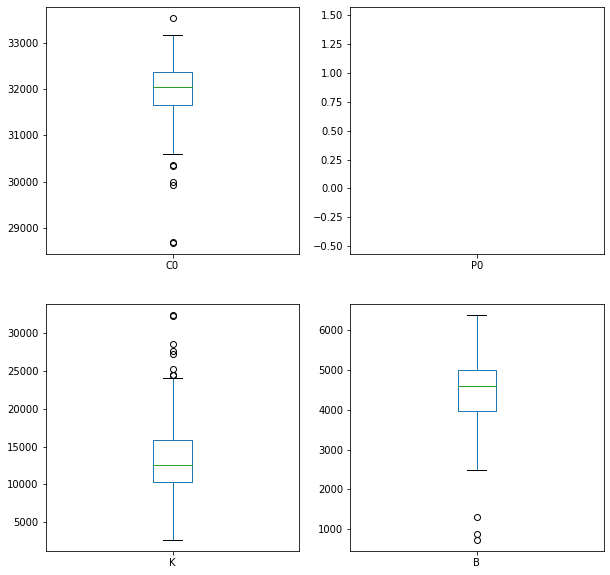

In [19]:
numerical_cols = ['C0', 'P0', 'K', 'B']
df.loc[:, numerical_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10), sharex=False)

Obergrenze berechnen (Nur auf Testdata)

In [20]:
q3 = df.loc[:, numerical_cols].describe().loc['75%']
iqr = q3 - df.loc[:, numerical_cols].describe().loc['25%']
upper_boundary = q3 + 1.5*iqr
upper_boundary

/home/maesi/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



C0    33463.875
P0          NaN
K     24265.875
B      6568.750
dtype: float64

In [22]:
import pandas_profiling
profile = df.profile_report(style={'full_width':True})
# Save report
profile.to_file(output_file="sgv-profile.html")
profile